# Outlier Detection

Outliers are nothing, but the extreme values that deviate highly from the other samples in the dataset. Compared to other samples, the outliers are considered as anomalies thus have negative imapact on any machine learning algorithm. Therefore it is necessary to remove those outliers as much as we can in order to obtain a robust ML model. In this example, we will see how outliers can be detected in Machine Learning. Here, we will use iris dataset and perform some data analysis task on it to acquire the desired result.
For this example, the iris dataset can be downloaded from the below google drive link. 
https://drive.google.com/file/d/1OWe9srmQHxolhsXe4lxHJcCM1jGZo2B4/view?usp=sharing

In [3]:
# Importing the necessary libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_csv('data01_iris-Copy1.csv')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df.describe(include = 'all')

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [8]:
df['Species'].value_counts() #this counts the total number of samples per class which is 50.

setosa        50
virginica     50
versicolor    50
Name: Species, dtype: int64

array([[<AxesSubplot:title={'center':'Sepal.Length'}>]], dtype=object)

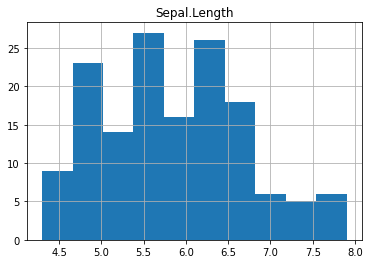

In [9]:
df.hist('Sepal.Length') #now lets draw the histogram for the features of the iris dataset, for sepal length

<AxesSubplot:>

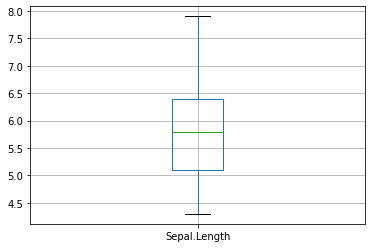

In [10]:
df.boxplot('Sepal.Length') # we can also plot the box plot of the value distribution of the sepal length.

Median (Q2/50th Percentile): the middle value of the dataset.
First quartile (Q1/25th Percentile): the middle number between the smallest number (not the “minimum”) and the median of the dataset.
Third quartile (Q3/75th Percentile): the middle value between the median and the highest value (not the “maximum”) of the dataset.
Interquartile range (IQR): 25th to the 75th percentile.
“Maximum”: Q3 + 1.5*IQR
“Minimum”: Q1 ‐1.5*IQR
The values that lies outside the maximum and minimum range are declared as outliers.
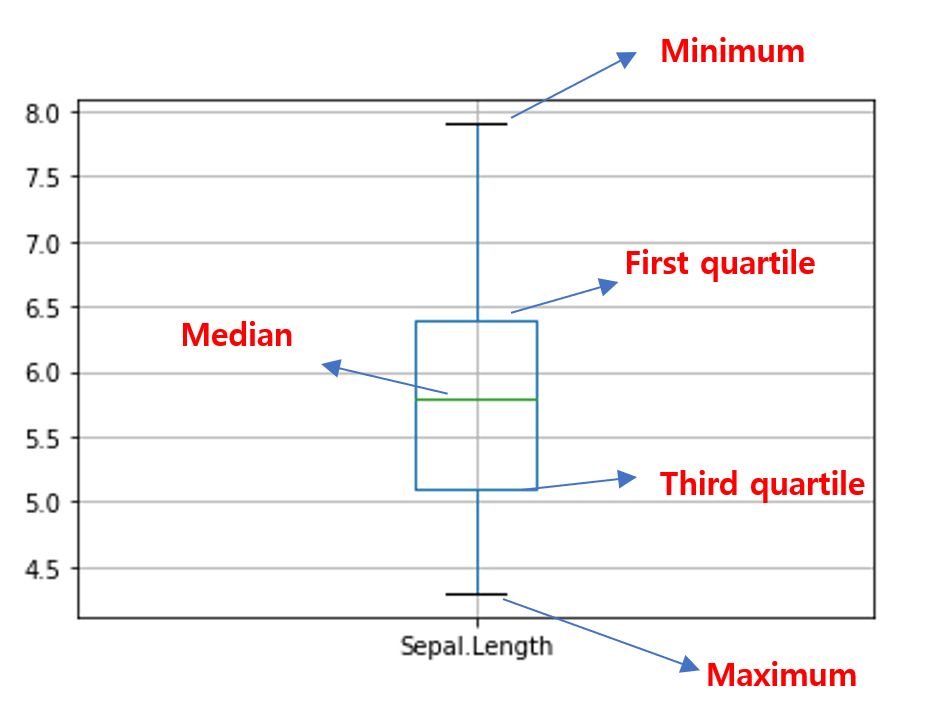

In [11]:
#now lets get all the values of the boxplot as we discussed above.
data = df['Sepal.Length']
Q3, Q1 = np.percentile(data, [75,25])
Q2 = np.mean(data)
IQR = Q3 - Q1
print(Q3, Q2, Q1, IQR)

6.4 5.843333333333334 5.1 1.3000000000000007


In [12]:
df['Sepal.Length'].describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: Sepal.Length, dtype: float64

<AxesSubplot:xlabel='Sepal.Length', ylabel='Sepal.Width'>

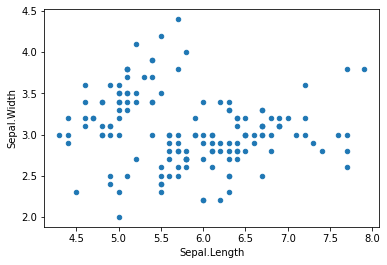

In [24]:
#lets visualize the with scatter plot the distribution of the sepal width and sepal length 
df.plot.scatter('Sepal.Length','Sepal.Width')

<AxesSubplot:xlabel='Sepal.Length', ylabel='Sepal.Width'>

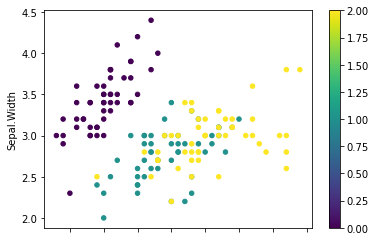

In [25]:
#according to the categories, which is 3 in this example (versicolor, virginica, and setosa) we can plot the scatter plotting to see the visualization of teh samlpes 
SpeciesCode = df['Species'].astype('category').cat.codes
df.plot.scatter('Sepal.Length','Sepal.Width',c=SpeciesCode,colormap='viridis')

<AxesSubplot:>

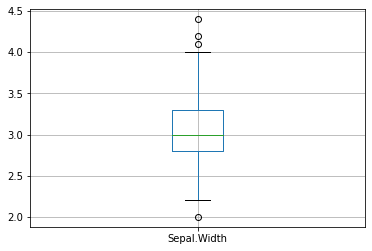

In [26]:
# univariate outlier detection
# outlier check for each variable
#for one feature (sepal width), lets plot the boxplot of indicating all the necessary parameters required for outlier detection
df.boxplot('Sepal.Width')

In [32]:
#here we take the last column values of the dataframe and then perform k means clustering. We will learn about this in upcoming
#lessons, but for now lets regard this as to find the center matrix of the samples. 
x = df.iloc[:,:-1].values
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km.fit(x)
center_matrix = km.cluster_centers_[km.labels_,:]
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [33]:
#we can define the outlier index by setting a threshold where we will compare the distance of each sample to the center matrix generated above
dist = ((x-center_matrix)**2).sum(axis=1)
np.sort(dist)
outlier_idx = dist>2.0

In [34]:
outlier_idx #plotting the index of the outliers to be true and the non outliers are false.

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False,

Now lets see the outliers by plotting them, the yellow dots represents the outliers

<AxesSubplot:xlabel='Sepal.Length', ylabel='Sepal.Width'>

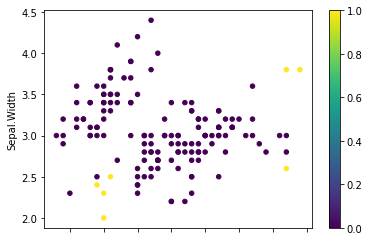

In [35]:
df.plot.scatter('Sepal.Length','Sepal.Width',c=outlier_idx,colormap='viridis')

<AxesSubplot:xlabel='Petal.Length', ylabel='Petal.Width'>

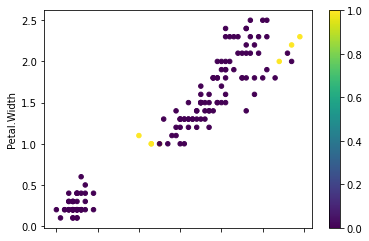

In [36]:
df.plot.scatter('Petal.Length','Petal.Width',c=outlier_idx,colormap='viridis')

<AxesSubplot:xlabel='Sepal.Length', ylabel='Petal.Length'>

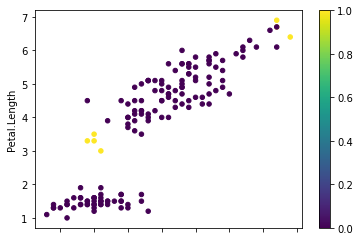

In [37]:
df.plot.scatter('Sepal.Length','Petal.Length',c=outlier_idx,colormap='viridis')